택시(taxi)비 지출액 분석 및 시각화

- 택시 raw 데이터 읽어들이기

In [3]:
import pandas as pd
import os
import csv

filePath = './card.csv'
df = pd.read_csv(filePath, encoding='utf8', skiprows=0)
print(df)

                  이용일시      승인번호 본인구분 브랜드  이용카드          가맹점명    이용금액    이용구분  \
0    2019/10/12  09:13   1972753    본  S&   185    네이버파이낸셜(주)  546800  일시불(A)   
1    2019/10/12  11:56   3399357    본  S&   185         GS  샵   60440  일시불(A)   
2    2019/10/13  09:16  12621902    본  S&   185           G마켓   91520    P(A)   
3    2019/10/14  01:32  20726947    본  S&   185          11번가   89810  일시불(A)   
4    2019/10/14  07:06  21234320    본  S&   185    네이버파이낸셜(주)   33600  일시불(A)   
..                 ...       ...  ...  ..   ...           ...     ...     ...   
232  2019/12/30  17:59  11171348    본  S&   185  카페마마스  강남역지점   16800     일시불   
233  2019/12/31  12:35  18054067    본  S&   185   (주)현대백화점목동점   51502     일시불   
234  2019/12/31  12:43  18170026    본  S&   185   (주)현대백화점목동점    9200     일시불   
235  2019/12/31  12:50  18277034    본  S&   185   (주)현대백화점목동점   15000     일시불   
236  2019/12/31  14:12  19443195    본  S&   185            쿠팡   16640     일시불   

     매입상태  
0    부분취소  
1  

In [5]:
dateimeindex = pd.DatetimeIndex(df['이용일시'])
print(dateimeindex.month)

Int64Index([10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
            ...
            12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
           dtype='int64', name='이용일시', length=237)


Int64Index([10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
            ...
            12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
           dtype='int64', name='이용일시', length=237)

In [6]:
dateimeindex = pd.DatetimeIndex(df['이용일시'])
df['month'] = dateimeindex.month
print(df['month'])

0      10
1      10
2      10
3      10
4      10
       ..
232    12
233    12
234    12
235    12
236    12
Name: month, Length: 237, dtype: int64


 # 택시비 지출 내역만 선별 
 
 - 매입상태가 '전표매입' & 지출내역이 택시(taxi)비인 지출액만 포함 시키기 위해서 함수 생성
 - apply() 함수를 통해서 행마다 함수 호출해서 True/False 값을 받아서 그 행의 금액을 계산에 포함할지 안할지 여부 판단

In [8]:
def get_texi(sr):
    payment = 0
    if sr[8] == '전표매입' and '택시' in sr[5]:
        payment = sr[6]
    else :
        payment = 0
    return payment

df['이용금액'] = df.apply(get_texi, axis = 1)
print(df['이용금액'].sum())

145300


 - 월별로 택시비만 합산한 금액

In [9]:
taxi_df = df.groupby('month')['이용금액'].sum()
print(taxi_df[10], taxi_df[11], taxi_df[12])

8600 83900 52800


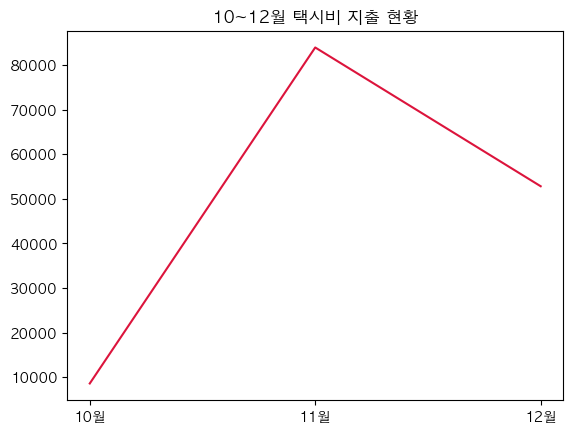

In [12]:
import matplotlib.pyplot as plt
plt.title('10~12월 택시비 지출 현황')
plt.plot(['10월', '11월', '12월'], taxi_df, color = 'crimson', label = '택시비 지출액')
plt.legend
plt.show()